In [6]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator as ig
from keras import optimizers
import scipy
import pylab
import matplotlib.cm as cm
from keras.optimizers import SGD,Adam

In [2]:
test=r'C:\Users\hp\Amazon\Augmented\Test'
train=r'C:\Users\hp\Amazon\Augmented\Train'

In [3]:
datagen = ig(rescale=1.0/255.0)
# preparing the iterators
train_gen = datagen.flow_from_directory(train,class_mode='categorical',color_mode="grayscale", batch_size=25, target_size=(200, 200))
test_gen= datagen.flow_from_directory(test,class_mode='categorical',color_mode="grayscale", batch_size=25, target_size=(200, 200))

Found 1740 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [4]:
#building the model layout
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',name="LAYER_1", kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu',name="LAYER_2" ,kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',name="LAYER_3" ,kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_1"))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_2"))

model.add(Dense(3, activation='softmax',name="OUTPUT"))
print("Summary:--\n",model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LAYER_1 (Conv2D)             (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
LAYER_2 (Conv2D)             (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
LAYER_3 (Conv2D)             (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)            

In [7]:
#compiling the  model with SGD as optimizer
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [12]:
#checking the performance
results = model.fit(train_gen, steps_per_epoch=np.floor(len(train_gen)//10),validation_data=test_gen,validation_steps=len(test_gen),shuffle=True,epochs=10)

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.7213 - accuracy: 0.6743 - val_loss: 0.7677 - val_accuracy: 0.7333
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6956 - accuracy: 0.6229 - val_loss: 0.4564 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.7078 - accuracy: 0.6686 - val_loss: 0.4860 - val_accuracy: 0.7167
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.6447 - accuracy: 0.6857 - val_loss: 0.4836 - val_accuracy: 0.7333
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.5408 - accuracy: 0.7943 - val_loss: 0.6147 - val_accuracy: 0.7167
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.5170 - accuracy: 0.7714 - val_loss: 0.4308 - val_accuracy: 0.7833
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.6065 - accuracy: 0.7455 - val_loss: 0.5548 - val_accuracy: 0.7000
Epoch 8/10
7/7 [=======================

In [13]:
#checking model configuration
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'LAYER_1',
    'trainable': True,
    'batch_input_shape': (None, 200, 200, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_1',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'chan

In [14]:
#visualization of loss and accuracy
record=results.history
record

{'val_loss': [0.7677050828933716,
  0.45635777711868286,
  0.48596349358558655,
  0.4835835099220276,
  0.6146751046180725,
  0.4307551383972168,
  0.5548294186592102,
  0.3810160160064697,
  0.5714186429977417,
  0.40145745873451233],
 'val_accuracy': [0.7333333492279053,
  0.75,
  0.7166666388511658,
  0.7333333492279053,
  0.7166666388511658,
  0.7833333611488342,
  0.699999988079071,
  0.7333333492279053,
  0.75,
  0.800000011920929],
 'loss': [0.7212605987276349,
  0.6956271358898708,
  0.7077928781509399,
  0.6446887254714966,
  0.5407933465072087,
  0.5169686675071716,
  0.5956689914067587,
  0.5098550958292825,
  0.4664097343172346,
  0.4319931311266763],
 'accuracy': [0.6742857,
  0.62285715,
  0.6685714,
  0.6857143,
  0.7942857,
  0.7714286,
  0.74545455,
  0.8057143,
  0.7828571,
  0.8]}

In [15]:
loss=record['loss']
acc=record['accuracy']
valid_loss=record['val_loss']
val_acu=record['val_accuracy']
epoch=range(1,len(loss)+1)

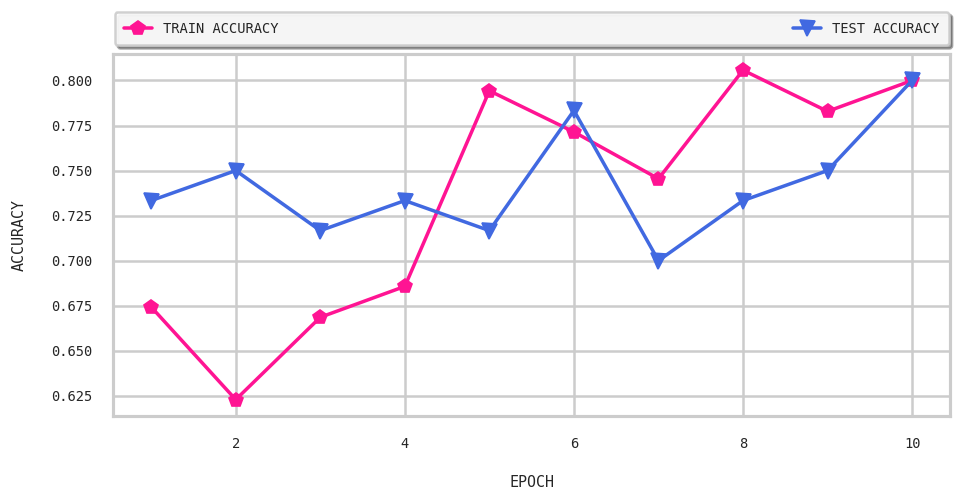

In [16]:
#PLOTTING ACCURACY VALUES
plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

plt.setp(l1,color='deeppink',marker="p",linewidth=2.1)
plt.setp(l2,color='royalblue',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('ACCURACY\n')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

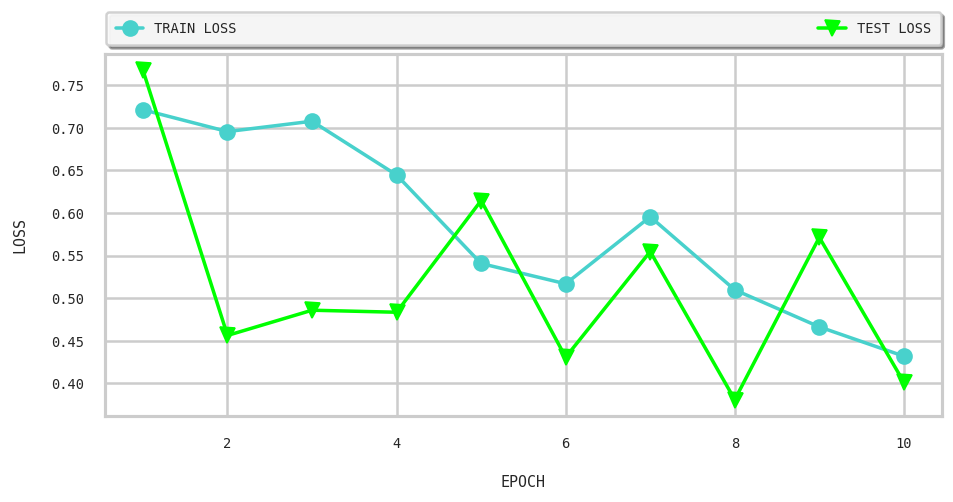

In [17]:
#PLOTTING LOSS VALUES
plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,loss,label="TRAIN LOSS")
l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

plt.setp(l1,color='mediumturquoise',marker="o",linewidth=2.1)
plt.setp(l2,color='lime',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('LOSS\n')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

In [18]:
#saving the model
model.save("amazon_augmented_cnn.h5")

In [19]:

#visualization of filters generated by convolutional layer
#checking details of different layers implemented in the model
layr=model.layers
layr

Layer= LAYER_1 
Shape= (3, 3, 1, 32)

weights= [[[[ 5.79723239e-01  1.19349517e-01  4.49299753e-01 -5.25419176e-01
    -3.55098516e-01 -3.55552405e-01  1.48354277e-01  1.88583508e-01
    -5.33835173e-01 -6.18104152e-02  7.51795292e-01  4.69810575e-01
    -4.52752829e-01  2.22370222e-01 -7.23791957e-01  5.33674777e-01
     7.25672245e-01 -6.28859162e-01  4.96797621e-01  4.35735881e-01
    -2.97254354e-01 -3.23509753e-01  1.09928697e-01  7.09827125e-01
     1.46129668e-01 -7.09794641e-01  4.97393578e-01 -3.71362150e-01
     4.79366362e-01  5.58657087e-02  1.71589069e-02  1.92416519e-01]]

  [[-5.96928895e-01  5.47502078e-02 -3.39175284e-01 -2.16714978e-01
     7.68526495e-01  3.41814160e-01 -6.83174610e-01  1.28218025e-01
     5.49531460e-01 -2.13696122e-01 -3.21366876e-01 -8.04598094e-04
    -6.43732309e-01 -2.50022769e-01  1.08226910e-01  3.52054983e-01
    -7.69298851e-01  6.19453669e-01  3.84722352e-01  3.68073434e-01
    -6.67516649e-01  7.13398516e-01  2.57922173e-01 -2.30665490e-0

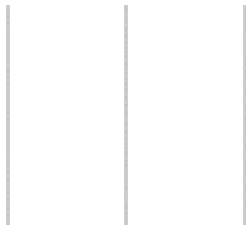

Layer= LAYER_2 
Shape= (3, 3, 32, 32)

weights= [[[[ 2.38707922e-02 -5.10137975e-02 -1.36681348e-01 ... -1.19727671e-01
    -2.94459332e-02 -7.95742590e-03]
   [-1.28200069e-01  4.73137200e-02  9.80583578e-02 ...  2.18903124e-02
    -6.29398450e-02 -6.40323013e-03]
   [-4.23186570e-02  5.83020458e-03  1.07016645e-01 ...  1.28527611e-01
    -2.00561360e-02  6.96864352e-02]
   ...
   [ 4.29231748e-02  1.61934104e-02 -8.45924243e-02 ... -1.14020012e-01
     2.77804341e-02 -6.42140657e-02]
   [ 7.00463355e-02  1.42670795e-01 -4.04435806e-02 ...  2.96153948e-02
     2.74253916e-02 -1.42232656e-01]
   [-8.07513371e-02  1.19101685e-02 -1.11265376e-01 ...  1.30677700e-01
     3.08783771e-03 -1.05742224e-01]]

  [[-1.24521002e-01 -1.40883788e-01 -3.30042578e-02 ...  1.23660579e-01
    -3.21570933e-02  3.42709459e-02]
   [-1.32048696e-01  2.76865847e-02 -1.21115990e-01 ...  8.18564519e-02
     2.33085491e-02  2.65974142e-02]
   [ 9.94743779e-02 -9.07274708e-02  2.72784568e-02 ...  1.23607464e-01

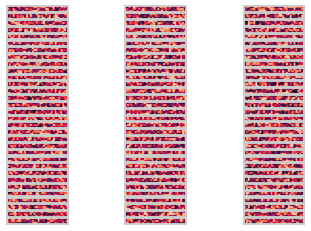

Layer= LAYER_3 
Shape= (3, 3, 32, 64)

weights= [[[[-0.05729711 -0.00726523  0.08384153 ...  0.1306019  -0.14034554
    -0.08330318]
   [-0.05163442 -0.01747774 -0.12459534 ... -0.11783158 -0.09844799
    -0.00336647]
   [ 0.03667838  0.14026156 -0.10835849 ...  0.11241386  0.10149869
    -0.11059057]
   ...
   [-0.03983431 -0.08480652 -0.08003785 ...  0.05458179  0.06627148
    -0.07464271]
   [ 0.07067797  0.11879972  0.07102289 ... -0.12321988 -0.08375911
    -0.06551033]
   [ 0.12067139 -0.0779308  -0.02387731 ... -0.0967149  -0.00772324
     0.13520208]]

  [[ 0.09219825  0.11489672 -0.13509932 ...  0.11296971 -0.08263563
     0.05398609]
   [-0.07433714  0.14221664 -0.00956316 ... -0.00753656  0.04670075
    -0.037845  ]
   [ 0.03133518 -0.06309604 -0.10502276 ...  0.04063201  0.09719133
    -0.08267136]
   ...
   [-0.01078613 -0.09836347  0.02503789 ... -0.03644533  0.03399182
    -0.08569729]
   [-0.0872222   0.07616805 -0.02569978 ...  0.13437702 -0.0710552
     0.11905409]
  

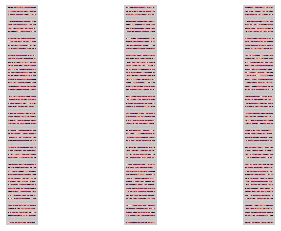

In [20]:
#visualization of filters generated by convolutional layer
#searching for convolutional layers in the layers to obtain the weights and bias used
#will seacrh for name LAYER as my conv were named LAYER

for layer in layr:
    if 'LAYER' in layer.name:
        weights, bias= layer.get_weights()
        print("Layer=",layer.name,"\nShape=", weights.shape)
        print("\nweights=",weights)
        
 #normalizing the value of weight obtained in a range of  0 and 1 for proper visualization
        weight_min= weights.min()
        weight_max =  weights.max()
        print("Maxm=",weight_max,'\nMinm=',weight_min)
        filters = (weights - weight_min) / (weight_max - weight_min)  
        print(filters.shape[3])
        filter_cnt=1
  #plotting all the filters
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]

            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,j])
                filter_cnt+=1
        plt.show()